# Entropy


Given a random variable $X$ that can take on values $\{ \oplus, \ominus \}$,the entropy is defined as: $$E(X) = - \sum_{x \in \{\oplus, \ominus\}} P(X=x) \log_2 P(X=x).$$ Since $P(X=\oplus) + P(X=\ominus) = 1$, $E(X)$ can be rewritten as a function of $P(X=\oplus)$, substituting $P(X=\ominus)$ with $1-P(X=\oplus)$. Letting $p_\oplus = P(X=\oplus)$ in short:$$ E(X) = f(p_\oplus) = -p_\oplus \log_2 p_\oplus - (1-p_\oplus) \log_2 (1 - p_\oplus). $$ Figure below shows how $f(p_\oplus)$ behaves as $p_\oplus$ changes. <figure><center><img  src="https://drive.google.com/uc?export=view&id=1PRpDVWLHnLgs0GQyUU-L-_oAteRUKdM_" height="300px"> <figcaption>Figure 1. Entropy</figcaption></center></figure>

Extend the above analysis to a random variable $Y$ that can take on values
$\{ \alpha, \beta, \gamma \}$. Given $p_\alpha = P(Y = \alpha)$, etc.,

Write a short program to calculate $f(p_\alpha, p_\beta)$ derived above,
and obtain the $E(Y) = f(p_\alpha, p_\beta)$ values for all combinations of $p_\alpha, p_\beta \in \{ 0.0, 0.01, 0.02, ... , 0.99, 1.0 \}$, and plot in 3D (python: plot_surface; or draw by hand). 

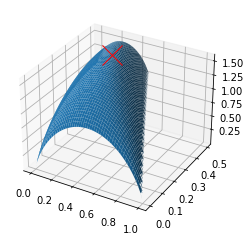

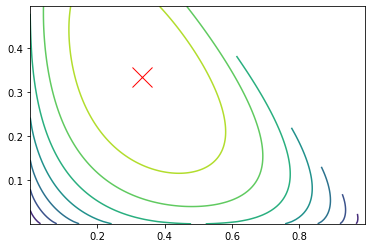

In [1]:
# Code

import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma 

#---------------------------------
# Entropy function f(Pa,Pb) = E(Y)
#---------------------------------

def f(Pa,Pb):

  #-------------------------------------------------------
  #filtering out any zeros when passing the values to log2 
  #-------------------------------------------------------
  logpa = np.log2(Pa, out=np.zeros_like(Pa), where=(Pa!=0))
  logpb = np.log2(Pb, out=np.zeros_like(Pb), where=(Pb!=0))
  logpapb = np.log2(1-Pa-Pb, out=np.zeros_like(1-Pa-Pb), where=((1-Pa-Pb)!=0))
  sum_ = Pa+Pb
  res = -(Pa*logpa+Pb*logpb+(1-Pa-Pb)*logpapb)
  return res

#-------------------
# Plot 
#-------------------
x = np.arange(0.0001, 1.0, 0.005)
y = np.arange(0.0001, 1.0, 0.005)

#-------------------------------------------------------------------------
# Now, ensuring that x+y <= 1 since x and y are probabilities in this case 
#-------------------------------------------------------------------------
y = y[x+y <= 1]    
xx, yy = np.meshgrid(x, y)

import warnings
warnings.filterwarnings("ignore")


#----------------
# 3D surface plot
#----------------
z = f(xx,yy)
z = np.ma.array(z, mask=np.isnan(z))
#z[np.isnan(z)] = 0 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,z,zorder=0,vmin=np.nanmin(f(xx,yy)), vmax=np.nanmax(f(xx,yy)))


#Mark point where E is maximum. 
ax.plot([0.33333],[0.33333],[f(0.33333,0.33333)],marker="x",markerfacecolor="red",markersize=20, markeredgecolor="red",zorder=10)

#--------------------------------
# show contour plot as well
#--------------------------------

fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.contour(xx,yy,f(xx,yy),vmin=np.nanmin(f(xx,yy)), vmax=np.nanmax(f(xx,yy)))

#--------------------------------
# Mark point where E is maximum. 
#--------------------------------

ax2.plot(0.33333,0.33333,marker="x",markerfacecolor="red",markersize=20, markeredgecolor="red")

# Decision Tree Learning

A short program to compute the information gain, given the original data set's postive/negative sample count, and the resulting branches based on the attribute values and their positive/negative sample counts. 

Using the data set in Table 1, for each attribute, compute the info gain, using your info_gain() function, and report the resulting values.

After choosing the best attribute from step (2), repeat the process for the resulting branches, to select the next attribute to test for each branch. If some branch is already a leaf, no need to repeat the info_gain computation. For example, if "GPU" was the best attribute, do the analysis for branches "NVIDIA", "RADEON", and "don't care". 

TABLE 1

Instance# | GPU | CPU | OS | Decision (Buy?)
--- | --- | --- | --- | ---
1 | NVIDIA | Intel | ChromeOS | N
2 | Radeon | Intel | Linux | Y
3 | Don't care | AMD | Windows | Y
4 | NVIDIA | Intel | MS DOS | N
5 | Radeon | Intel | Windows | Y
6 | Radeon | Intel | MS DOS | N
7 | Radeon | AMD | Windows | N
8 | Radeon | AMD | Linux | Y
9 | Don’t care | AMD | ChromeOS | N
10 | NVIDIA | Intel | Linux | Y
11 | NVIDIA | AMD | ChromeOS | Y
12 | NVIDIA | AMD | Windows | N

In [2]:
# 1.
def Entropy(num_positive, num_negative):
  #print("nothing here yet")
  Pplus = num_positive/(num_positive + num_negative)
  Pminus = num_negative/(num_positive + num_negative)
  if (Pplus == 0 or Pminus == 0):
    entropy = 0
  else:
    entropy = - Pplus*(np.log2(Pplus)) - Pminus*(np.log2(Pminus))
  return entropy

# 2. 
def info_gain(before, after):

  # "before" is a vector of two values = [#positive, #negative]
  # "after" is a matrix of n rows and 2 columns. Each row corresponds to the attribute value, and the columns correspond to #positive, #negative.
  print("Before testing:")
  print(before)
  
  print("After testing:")
  print(after)

  #--------------------------------
  #checking for errors in arguments
  #--------------------------------
  if sum(before) == sum(sum(after)):
    error = 1
  else:
    error = 0
    print("\nArguments don't add up.")

  if error == 1:
    arren = []
    #calculation for 'after' matrix
    x = after.shape
    x = list(x)
    no_of_attr = x[0]
    for i in range(no_of_attr):
      arr = after[i]
      p = arr[0]
      n = arr[1]
      arren.append(Entropy(p,n))
      
    arren = [x if np.isnan(x) == False else 0 for x in arren]

    
    second_part = 0 

    for i in range(no_of_attr):
      second_part = second_part + ((sum(after[i])/sum(before))*arren[i])

    gain = Entropy(before[0],before[1]) - second_part 

    print("Info gain="+str(gain),end="")
  
  else:
    print("Provide correct arguments and try again.")

  return " "


* **GPU: info gain = 0.0242**

In [3]:
before = np.array([6,6])  
after  = np.array([[2,3], [3,2], [1,1]]) 
info_gain(before, after)

Before testing:
[6 6]
After testing:
[[2 3]
 [3 2]
 [1 1]]
Info gain=0.024207837954442812

' '

* **CPU: info gain = 0.0**

In [4]:
before = np.array([6,6])  
after  = np.array([[3,3], [3,3]]) 
info_gain(before, after)

Before testing:
[6 6]
After testing:
[[3 3]
 [3 3]]
Info gain=0.0

' '

* **OS: info gain = 0.437**

In [5]:
before = np.array([6,6])  
after  = np.array([[1,2], [3,0], [0,2], [2,2]]) 
info_gain(before, after)

Before testing:
[6 6]
After testing:
[[1 2]
 [3 0]
 [0 2]
 [2 2]]
Info gain=0.43709270815304424

' '

Info gain for 
* **Branch: ChromeOS of Best attribute "OS" from step (1)**
 * GPU: info gain = 0.251
 * CPU: info gain = 0.251

In [6]:
before = np.array([1,2])  
after  = np.array([[1,1], [0,0], [0,1]]) 
print(info_gain(before, after))

before = np.array([1,2])  
after  = np.array([[0,1], [1,1]]) 
print(info_gain(before, after))

Before testing:
[1 2]
After testing:
[[1 1]
 [0 0]
 [0 1]]
Info gain=0.2516291673878229 
Before testing:
[1 2]
After testing:
[[0 1]
 [1 1]]
Info gain=0.2516291673878229 


* **Branch: Linux of Best attribute "OS" from step (1)** 
 * GPU: info gain = 0.0
 * CPU: info gain = 0.0


In [7]:
before = np.array([3,0])  
after  = np.array([[0,0],[2,0], [1,0]]) 
print(info_gain(before, after))

before = np.array([3,0])  
after  = np.array([[2,0], [1,0]]) 
print(info_gain(before, after))

Before testing:
[3 0]
After testing:
[[0 0]
 [2 0]
 [1 0]]
Info gain=0.0 
Before testing:
[3 0]
After testing:
[[2 0]
 [1 0]]
Info gain=0.0 


* **Branch: MSDOS of Best attribute "OS" from step (1)** 
 * GPU: info gain = 0.0
 * CPU: info gain = 0.0

In [8]:
before = np.array([0,2])  
after  = np.array([[0,0],[0,1], [0,1]]) 
print(info_gain(before, after))

before = np.array([6,6])  
after  = np.array([[3,3], [3,3]]) 
print(info_gain(before, after))

Before testing:
[0 2]
After testing:
[[0 0]
 [0 1]
 [0 1]]
Info gain=0.0 
Before testing:
[6 6]
After testing:
[[3 3]
 [3 3]]
Info gain=0.0 


* **Branch: Windows of Best attribute "OS" from step (1)** 
 * GPU: info gain = 0.5
 * CPU: info gain = 0.311

In [9]:
before = np.array([2,2])  
after  = np.array([[0,1],[1,1], [0,1]]) 
print(info_gain(before, after))

before = np.array([2,2])  
after  = np.array([[1,2],[1,0]]) 
print(info_gain(before, after))

Before testing:
[2 2]
After testing:
[[0 1]
 [1 1]
 [0 1]]
Info gain=0.5 
Before testing:
[2 2]
After testing:
[[1 2]
 [1 0]]
Info gain=0.31127812445913283 
